In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt

In [2]:
fake_backend = FakeManilaV2()
simulator = AerSimulator()

In [3]:
# create bell state
qc = QuantumCircuit(4, 2)
qc.id(0)
qc.id(1)
qc.id(2)
qc.id(3)
qc.h(2)
qc.cx(2, 3)
qc.measure(2, 0)
qc.measure(3, 1)

In [4]:
def generate_crosstalk_noise_model(target_qubits: list[int], error_rate: float = 0.01) -> NoiseModel:
    model = NoiseModel()
    crosstalk = pauli_error([("X", error_rate), ("I", 1 - error_rate)])
    for q in target_qubits:
        model.add_quantum_error(crosstalk, ["id"], [q])
    return model

def run_simulation(
    qc: QuantumCircuit,
    noise_model: NoiseModel,
    backend: AerSimulator,
    shots: int = 2048
) -> dict:
    tqc = transpile(qc, backend, optimization_level=0)
    result = backend.run(tqc, noise_model=noise_model, shots=shots).result()
    return result.get_counts()

In [5]:
# Case 1: All qubits on one QPU — simulate calibration noise spillover
crosstalk_qubits = [2, 3]  # Bell state qubits affected by calibration on qubits 0 and 1
noise_model_with_crosstalk = generate_crosstalk_noise_model(crosstalk_qubits, error_rate=0.03)

In [6]:
# Case 2: Simulate isolated QPUs (no crosstalk)
noise_model_isolated = NoiseModel()  # Ideal scenario

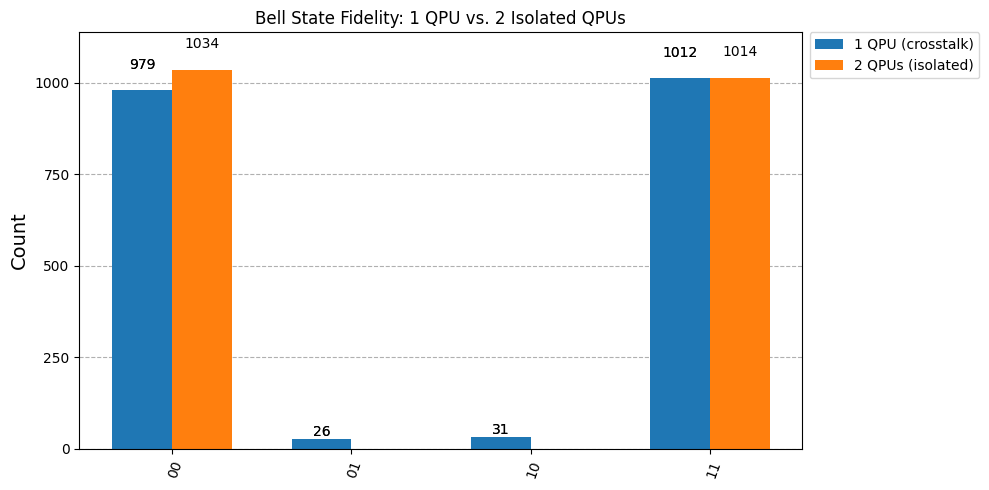

In [7]:
counts_with_crosstalk = run_simulation(qc, noise_model_with_crosstalk, fake_backend)
counts_isolated = run_simulation(qc, noise_model_isolated, fake_backend)

plot_histogram(
    [counts_with_crosstalk, counts_isolated],
    legend=["1 QPU (crosstalk)", "2 QPUs (isolated)"],
    title="Bell State Fidelity: 1 QPU vs. 2 Isolated QPUs",
    figsize=(10, 5)
)

In [9]:
import networkx as nx

(np.float64(-0.10500000000000001),
 np.float64(1.105),
 np.float64(-0.10500000000000001),
 np.float64(1.105))

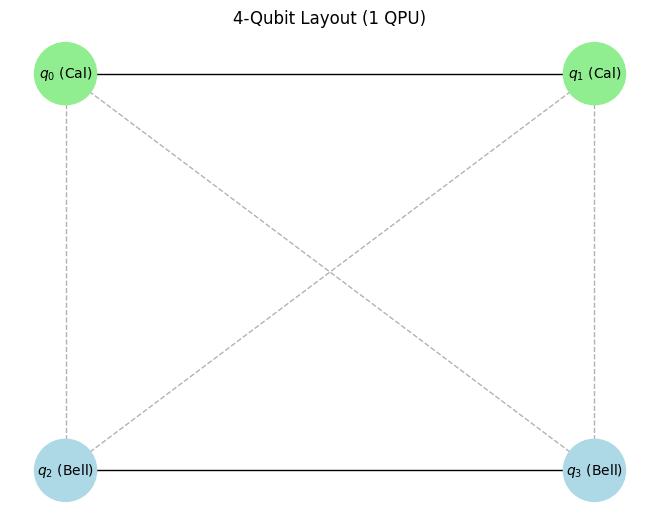

In [ ]:
G = nx.Graph()
G.add_edges_from([(0, 1), (2, 3)])  # Couplings

pos = {
    0: (0, 1),
    1: (1, 1),
    2: (0, 0),
    3: (1, 0)
}

crosstalk_edges = [(0, 2), (0, 3), (1, 2), (1, 3)]

colors = ['lightgreen', 'lightgreen', 'lightblue', 'lightblue']
labels = {0: "$q_0$ (Cal)", 1: "$q_1$ (Cal)", 2: "$q_2$ (Bell)", 3: "$q_3$ (Bell)"}

nx.draw(G, pos, with_labels=True, node_color=colors, labels=labels, node_size=2000, font_size=10)
# Draw crosstalk as dashed lines
nx.draw_networkx_edges(G, pos, edgelist=crosstalk_edges, style='dashed', edge_color='gray', alpha=0.6)

plt.title("4-Qubit Layout (1 QPU)")
plt.axis("off")

(np.float64(-0.10500000000000001),
 np.float64(1.105),
 np.float64(-0.10500000000000001),
 np.float64(1.105))

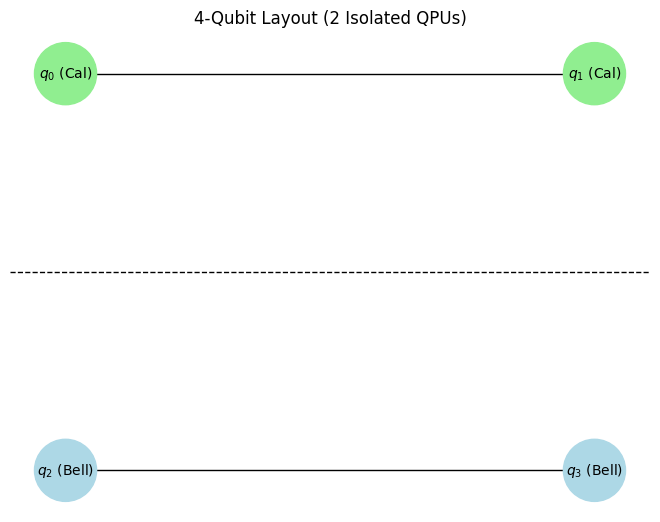

In [39]:
G = nx.Graph()
G.add_edges_from([(0, 1), (2, 3)])  # Couplings

pos = {
    0: (0, 1),
    1: (1, 1),
    2: (0, 0),
    3: (1, 0)
}

crosstalk_edges = []

colors = ['lightgreen', 'lightgreen', 'lightblue', 'lightblue']
labels = {0: "$q_0$ (Cal)", 1: "$q_1$ (Cal)", 2: "$q_2$ (Bell)", 3: "$q_3$ (Bell)"}

nx.draw(G, pos, with_labels=True, node_color=colors, labels=labels, node_size=2000, font_size=10)
# Draw crosstalk as dashed lines
nx.draw_networkx_edges(G, pos, edgelist=crosstalk_edges, style='dashed', edge_color='gray', alpha=0.6)

plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)

plt.title("4-Qubit Layout (2 Isolated QPUs)")
plt.axis("off")